In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [244]:
data=pd.read_csv('liver.csv')

In [245]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [246]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [248]:
data.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [249]:
data.Gender.replace({"Male":1,"Female":0},inplace=True)
data.Dataset.replace({1:0,2:1},inplace=True)

In [250]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [251]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [252]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Dataset']].groupby(['Dataset'])[[var]].median()
    return temp


In [253]:
median_target('Albumin_and_Globulin_Ratio')

,Albumin_and_Globulin_Ratio
Dataset,
0,0.9
1,1.0


In [254]:
data.loc[(data['Dataset'] == 0 ) & (data['Albumin_and_Globulin_Ratio'].isnull()), 'Albumin_and_Globulin_Ratio'] =0.9
data.loc[(data['Dataset'] == 1 ) & (data['Albumin_and_Globulin_Ratio'].isnull()), 'Albumin_and_Globulin_Ratio'] =1.0

In [255]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [256]:
data.rename(columns={'Dataset':'Have_Disease'},inplace=True)

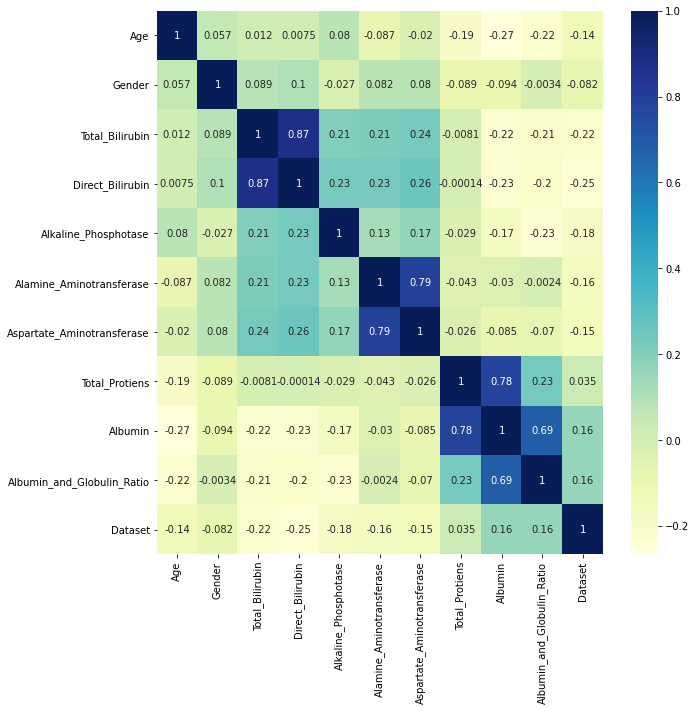

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot= True,)
plt.show()

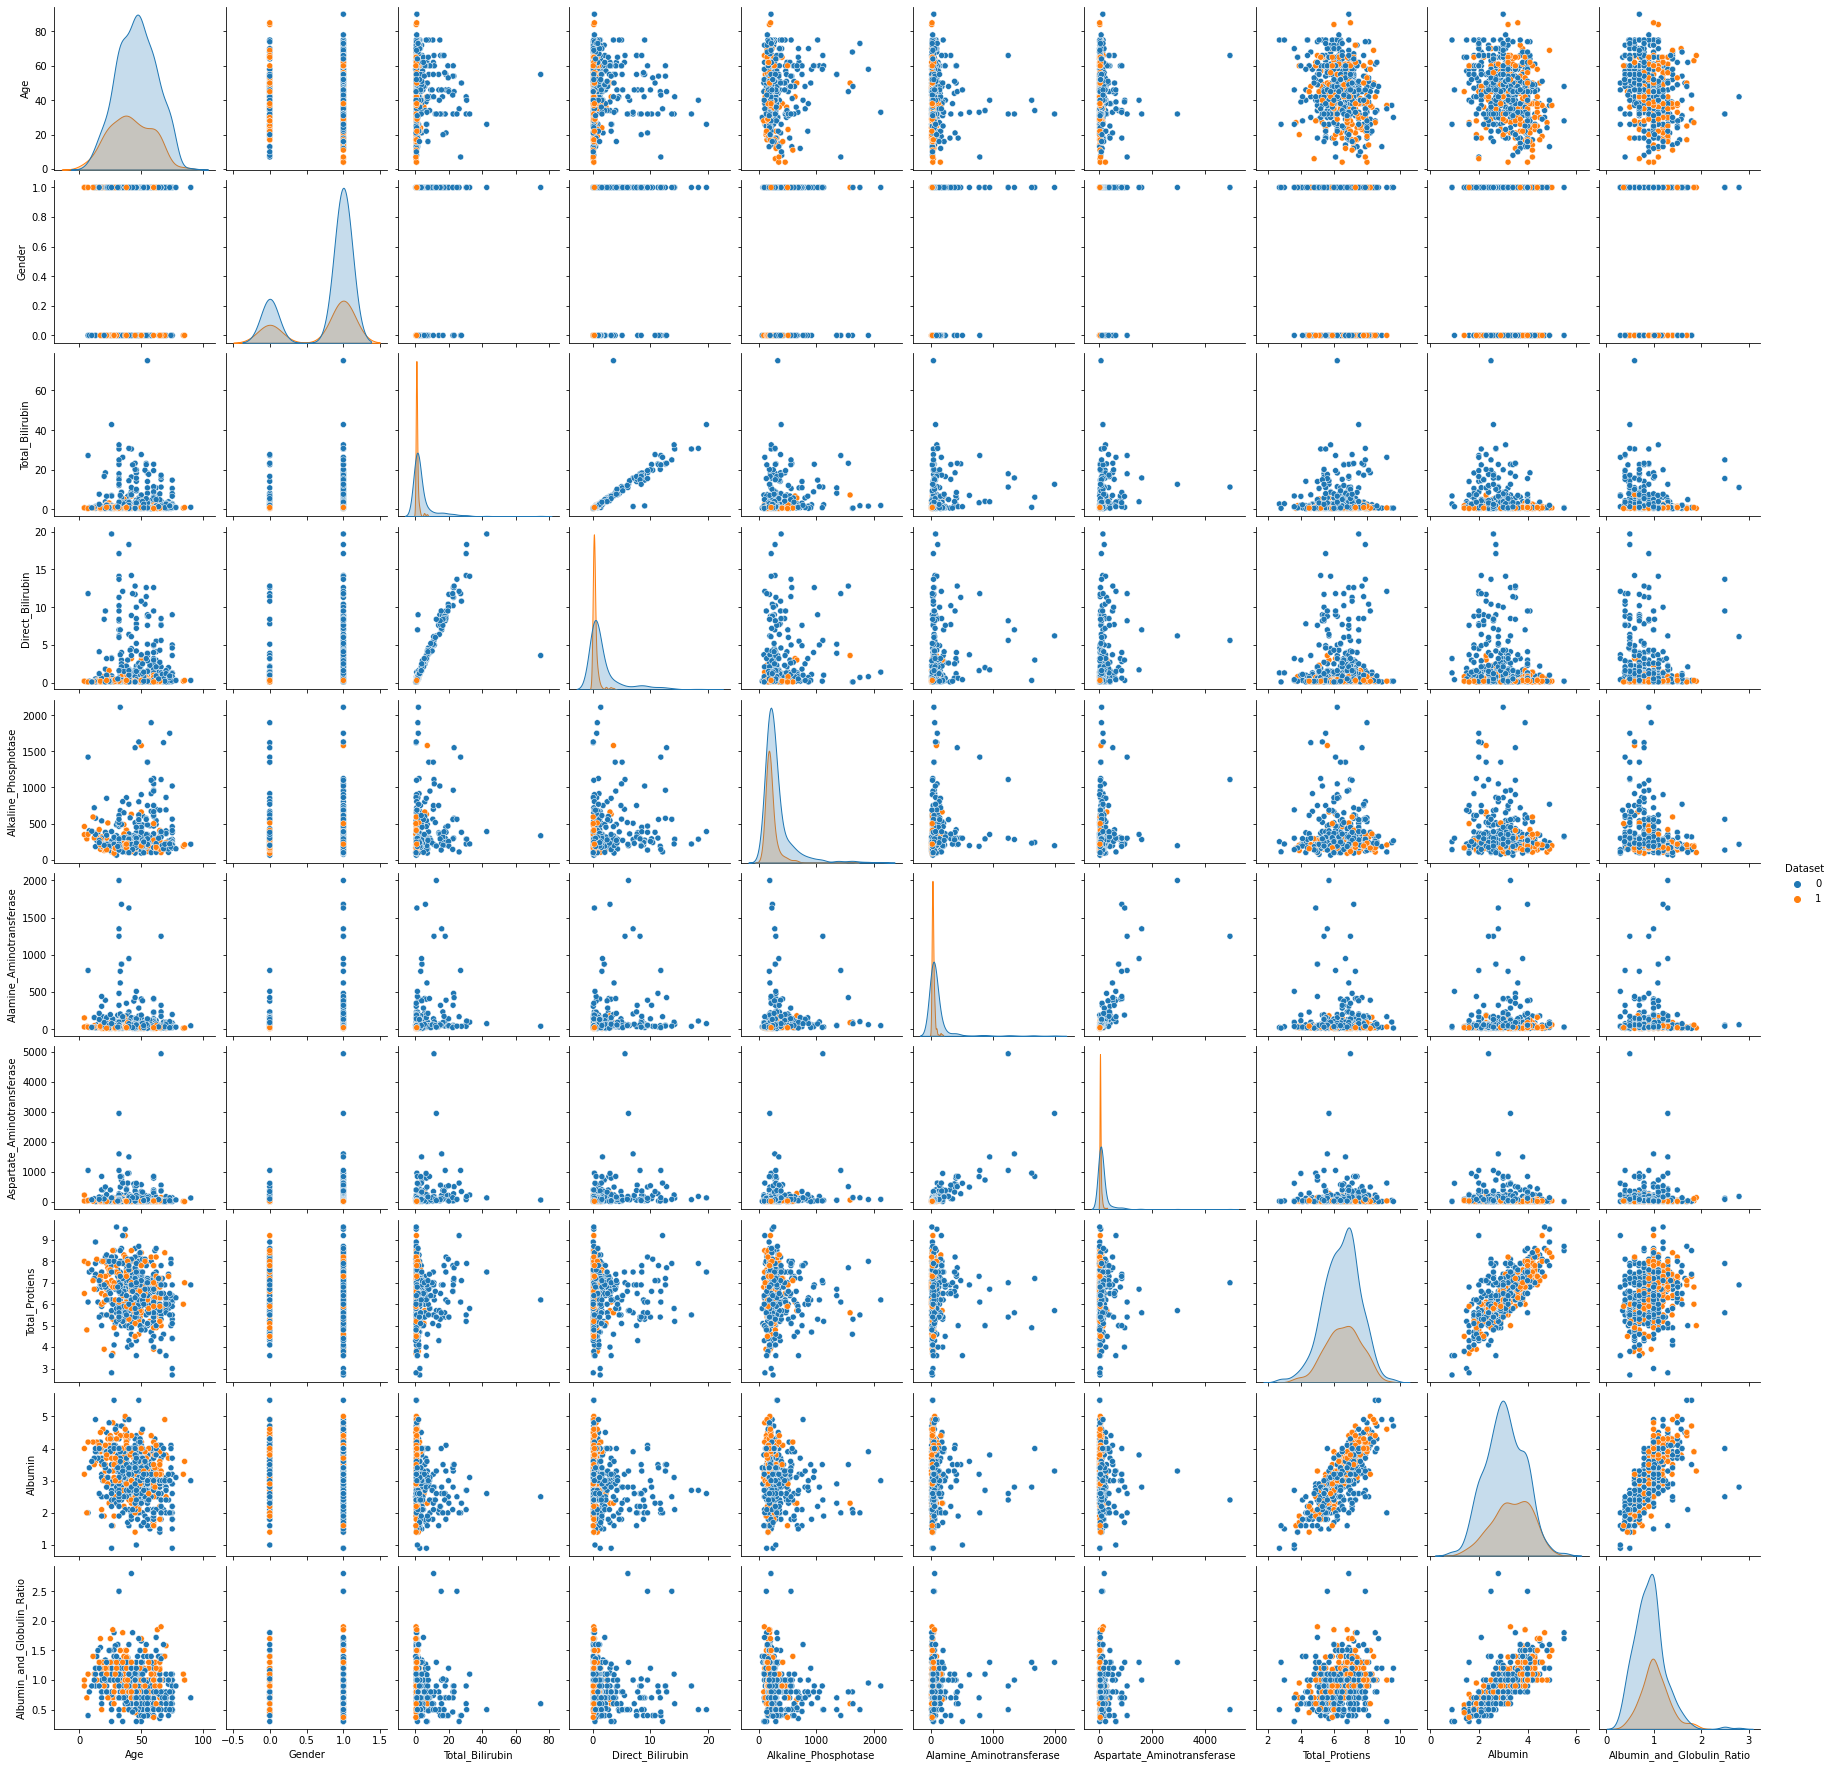

In [38]:
sns.pairplot(data=data,hue='Have_Disease',diag_kind='kde')
plt.show()

<AxesSubplot:>

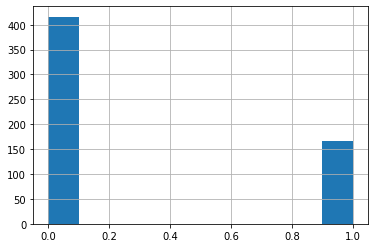

In [257]:
data['Have_Disease'].hist()

In [258]:
class evaluate_all_model:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.naive_bayes import CategoricalNB
    from sklearn.cluster import KMeans
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.preprocessing import StandardScaler
    from xgboost import XGBClassifier
    import time
    def __init__(self,x,y,given_state):
        self.x=x
        self.y=y
        self.given_state=given_state
        self.train_test_split()
        self.define_models()
        self.evaluate_model()
        print("best model base on Accuracy")
        print(self.best_model)
        
    def train_test_split(self):
        self.X_train, self.X_test, self.y_train,self.y_test =train_test_split(self.x, self.y,test_size=0.33, random_state=self.given_state)
        sc=self.StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
    def define_models(self):
        self.models={'LogisticRegression': self.LogisticRegression(),
    'RandomForestClassifier': self.RandomForestClassifier(),
     'KNeighborsClassifier': self.KNeighborsClassifier(),
    'DecisionTreeClassifier': self.DecisionTreeClassifier(),
    'SupportVectorMachine':self.SVC(),
    'GaussianNB': self.GaussianNB(),
    'BernoulliNB': self.BernoulliNB(),
    'GradientBoostingClassifier': self.GradientBoostingClassifier()
                    }
        
        self.modelNames =['LogisticRegression', 'RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','SupportVectorMachine',
                         'GaussianNB','BernoulliNB','GradientBoostingClassifier']
        self.trainScores = []
        self.testScores = []
        self.Time_taken=[]
        self.best_model_score=0
        self.best_model={}
        self.less_time=123
        
        
    def evaluate_model(self):
        for i in self.models:
            start = self.time.time()
            
            model=self.models[i]
            model.fit(self.X_train,self.y_train)
            train_score = model.score(self.X_train, self.y_train)
            self.trainScores.append(train_score)
            print(f'Model:- {i}')
            print(f'training score:- {train_score}')
            test_score = model.score(self.X_test, self.y_test)
            self.testScores.append(test_score)
            print(f'test Score:- {test_score}')
            
            y_predictions = model.predict(self.X_test)
            conf_matrix = confusion_matrix(y_predictions, self.y_test)
            print(f'Confussion Matrix: \n{conf_matrix}\n')
            
            tn = conf_matrix[0,0]
            fp = conf_matrix[0,1]
            tp = conf_matrix[1,1]
            fn = conf_matrix[1,0]
            accuracy  = (tp + tn) / (tp + fp + tn + fn)
            precision = tp / (tp + fp)
            recall    = tp / (tp + fn)
            f1score  = 2 * precision * recall / (precision + recall)
            specificity = tn / (tn + fp)
            print(f'Accuracy : {accuracy}')
            print(f'Precision: {precision}')
            print(f'Recall   : {recall}')
            print(f'F1 score : {f1score}')
            print(f'Specificity : {specificity}')

            end = self.time.time()
            time_taken=end-start
            self.Time_taken.append(time_taken)
            print(f'Time required {end-start}')
            print("***************************************************************************")
            print("____________________________________________________________________________")
            print("\n\n\n")
            if(float(test_score)>self.best_model_score):
                self.best_model["model Name"]=i
                self.best_model["Time Required on train and test"]=time_taken
                self.best_model["Accuracy on train data"]=train_score
                self.best_model["Accuracy on test data"]=accuracy
                self.best_model_score=test_score
                
            if(time_taken<self.less_time):
                self.less_time=time_taken
    def plot_bar(self):
        plt.bar(np.arange(len(self.trainScores)), self.trainScores, color='blue', width=0.25, edgecolor='white', label='train')
        plt.bar([x + 0.25 for x in np.arange(len(self.trainScores))], self.testScores, color='red', width=0.25, edgecolor='white', label='Test')
        plt.xlabel('Models', fontweight='bold', size = 24)
        plt.ylabel('Scores', fontweight='bold', size = 24)
        plt.xticks([r-0.25 for r in range(len(self.trainScores))], self.modelNames, rotation = 60)
        plt.legend()
        plt.show()
    def get_data(self):
        self.temp_dict={}
        self.temp_dict["Model"]=self.modelNames
        self.temp_dict["Training Score"]=self.trainScores
        self.temp_dict["Accuracy on Test"]=self.testScores
        self.temp_dict["Time Taken"]=self.Time_taken
        return self.temp_dict   
    def get_dataframe(self):
        return pd.DataFrame.from_dict(at.get_data()) 
            

In [259]:
X = data.drop('Have_Disease',axis=1).values
y = data['Have_Disease'].values
at=evaluate_all_model(X,y,4)

Model:- LogisticRegression
training score:- 0.7384615384615385
test Score:- 0.7305699481865285
Confussion Matrix: 
[[129  40]
 [ 12  12]]

Accuracy : 0.7305699481865285
Precision: 0.23076923076923078
Recall   : 0.5
F1 score : 0.3157894736842105
Specificity : 0.7633136094674556
Time required 0.032019615173339844
***************************************************************************
____________________________________________________________________________




Model:- RandomForestClassifier
training score:- 1.0
test Score:- 0.6994818652849741
Confussion Matrix: 
[[114  31]
 [ 27  21]]

Accuracy : 0.6994818652849741
Precision: 0.40384615384615385
Recall   : 0.4375
F1 score : 0.42000000000000004
Specificity : 0.7862068965517242
Time required 0.5281219482421875
***************************************************************************
____________________________________________________________________________




Model:- KNeighborsClassifier
training score:- 0.782051282051282
test 

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in double_scalars


Model:- GradientBoostingClassifier
training score:- 0.9615384615384616
test Score:- 0.689119170984456
Confussion Matrix: 
[[113  32]
 [ 28  20]]

Accuracy : 0.689119170984456
Precision: 0.38461538461538464
Recall   : 0.4166666666666667
F1 score : 0.4
Specificity : 0.7793103448275862
Time required 0.32007932662963867
***************************************************************************
____________________________________________________________________________




best model base on Accuracy
{'model Name': 'LogisticRegression', 'Time Required on train and test': 0.032019615173339844, 'Accuracy on train data': 0.7384615384615385, 'Accuracy on test data': 0.7305699481865285}


In [260]:
at.get_dataframe()

,Model,Training Score,Accuracy on Test,Time Taken
0,LogisticRegression,0.738462,0.730570,0.032020
1,RandomForestClassifier,1.000000,0.699482,0.528122
2,KNeighborsClassifier,0.782051,0.694301,0.088018
3,DecisionTreeClassifier,1.000000,0.678756,0.016010
4,SupportVectorMachine,0.715385,0.725389,0.088038
5,GaussianNB,0.576923,0.487047,0.015989
6,BernoulliNB,0.666667,0.632124,0.016005
7,GradientBoostingClassifier,0.961538,0.689119,0.320079


In [264]:
from imblearn.over_sampling import SMOTE

In [265]:
smotee = SMOTE(sampling_strategy = 'minority')

In [266]:
x_sm, y_sm = smotee.fit_resample(data.drop('Have_Disease',axis=1),data['Have_Disease'])


In [267]:
data = pd.concat([pd.DataFrame(x_sm),pd.DataFrame(y_sm)],axis=1)

In [268]:
X = data.drop('Have_Disease',axis=1).values
y = data['Have_Disease'].values
at=evaluate_all_model(X,y,4)
at.get_dataframe()

Model:- LogisticRegression
training score:- 0.7360861759425493
test Score:- 0.7345454545454545
Confussion Matrix: 
[[ 77  15]
 [ 58 125]]

Accuracy : 0.7345454545454545
Precision: 0.8928571428571429
Recall   : 0.6830601092896175
F1 score : 0.7739938080495357
Specificity : 0.8369565217391305
Time required 0.040015459060668945
***************************************************************************
____________________________________________________________________________




Model:- RandomForestClassifier
training score:- 1.0
test Score:- 0.7781818181818182
Confussion Matrix: 
[[ 91  17]
 [ 44 123]]

Accuracy : 0.7781818181818182
Precision: 0.8785714285714286
Recall   : 0.7365269461077845
F1 score : 0.8013029315960912
Specificity : 0.8425925925925926
Time required 0.595069169998169
***************************************************************************
____________________________________________________________________________




Model:- KNeighborsClassifier
training score:- 

,Model,Training Score,Accuracy on Test,Time Taken
0,LogisticRegression,0.736086,0.734545,0.040015
1,RandomForestClassifier,1.000000,0.778182,0.595069
2,KNeighborsClassifier,0.807899,0.669091,0.122973
3,DecisionTreeClassifier,1.000000,0.720000,0.007995
4,SupportVectorMachine,0.754039,0.709091,0.149128
5,GaussianNB,0.689408,0.654545,0.000000
6,BernoulliNB,0.725314,0.680000,0.023611
7,GradientBoostingClassifier,0.935368,0.741818,0.390681


In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
X = data.drop('Have_Disease',axis=1).values
y = data['Have_Disease'].values
prev=0
feat=0
for i in range(1,10,1):
    model=RandomForestClassifier(n_estimators=100,max_features=5,random_state=i,max_depth=18)
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33, random_state=58)
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    if(score>prev):
        print(score)
        prev=score
        feat=i

0.84
0.8436363636363636


In [289]:
feat

3

In [290]:
model=RandomForestClassifier(n_estimators=100,max_features=5,random_state=3,max_depth=18)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33, random_state=58)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8436363636363636

In [291]:
import pickle
pickle.dump(model, open('Liver_model', 'wb'))

In [292]:
items=data.columns
items

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Have_Disease'],
      dtype='object')

In [293]:
data.iloc[0].values

array([6.50e+01, 0.00e+00, 7.00e-01, 1.00e-01, 1.87e+02, 1.60e+01,
       1.80e+01, 6.80e+00, 3.30e+00, 9.00e-01, 0.00e+00])

In [295]:
max=[]
for i in items:
    max.append(data[i].describe()['max'])
max

[90.0, 1.0, 75.0, 19.7, 2110.0, 2000.0, 4929.0, 9.6, 5.5, 2.8, 1.0]

In [296]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Have_Disease
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,43.526442,0.675481,2.664073,1.163003,268.403846,66.459135,89.082933,6.518354,3.228892,0.981816,0.500000
std,16.188177,0.468477,5.308043,2.413845,212.820886,154.876118,244.562433,1.014318,0.756122,0.298808,0.500301
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,32.000000,0.000000,0.792916,0.200000,173.750000,22.000000,23.000000,5.829913,2.700000,0.800000,0.000000
50%,44.000000,1.000000,0.932777,0.300000,198.500000,32.000000,36.000000,6.600000,3.200000,1.000000,0.500000
75%,56.000000,1.000000,1.900000,0.856728,282.750000,53.000000,69.250000,7.200000,3.819371,1.126002,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [306]:
data['Albumin_and_Globulin_Ratio'].value_counts()

1.000000    116
0.800000     67
0.900000     62
0.700000     53
1.100000     49
           ... 
0.822434      1
0.580000      1
1.189720      1
1.126013      1
1.103838      1
Name: Albumin_and_Globulin_Ratio, Length: 302, dtype: int64